<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/Heat_eq_collocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Pseudoespectral method for one dimensional heat equation


# tphi + xxphi = 0;  unidimensional

N = 50

L0 = 1

x = np.cos(np.arange(N+1)*math.pi / (N))     # Collocation points [-1,1]

# Base Matrix (Tchebyshev Polinomials):

T = np.zeros([N+2,N+1])
xT = np.zeros([N+2,N+1])
xxT = np.zeros([N+2,N+1])

T[0,] = 1
T[1,] = x

for i in range(2,N+2):
  T[i,] = 2*x*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

xT[0,] = 0
xT[1,] = 1

for i in range(2, N+2):
  xT[i,] = 2*x*xT[i-1,] + 2*T[i-1,] - xT[i-2,]


xxT[0,] = 0
xxT[1,] = 0

for i in range(2, N+2):
  xxT[i,] = 2*xT[i-1,] + 2*x*xxT[i-1,] + 2*xT[i-1,] - xxT[i-2,]

psi = T[0:N+1,:]
xpsi = xT[0:N+1,:]
xxpsi = xxT[0:N+1,:]

# Initial conditions

f_0 = np.sin(x*math.pi)              # exact solution in t=0 at collocation points

inv_psi = np.linalg.inv(psi)


a0 = np.dot(f_0, inv_psi)  # coeficients a(0)

phi = np.dot(a0, psi)      # exact solution in t=0





In [14]:
# Plot: Condições Iniciais

M = 3000

xplot = np.linspace(-1,1,M)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = xplot


for i in range(2,N+2):
  Tplot[i,] = 2*xplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N+1,:]

fplot_0 = np.sin(xplot*math.pi)

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - fplot_0)


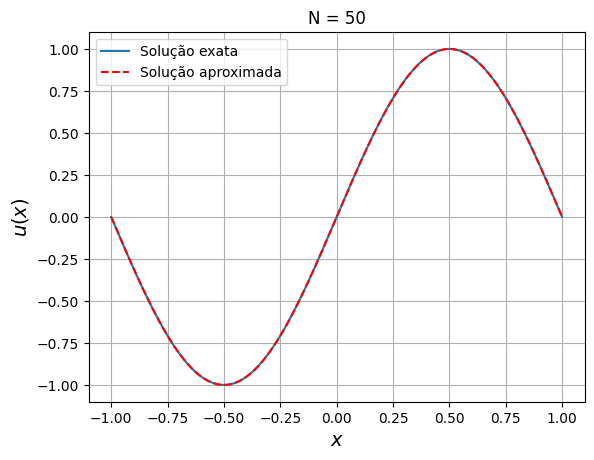

In [15]:
plt.plot(xplot, fplot_0, label = 'Solução exata')
plt.plot(xplot, phiplot,'--r', label = 'Solução aproximada')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$u(x)$', fontsize = 14)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.legend()
plt.title(f'N = {N}')
plt.grid()

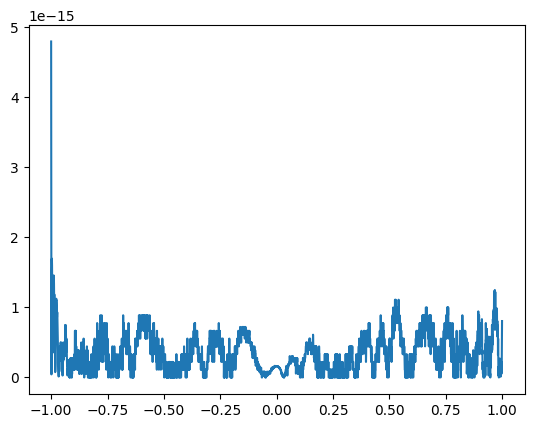

In [16]:
plt.plot(xplot, erro)

In [17]:
#Runge-Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It)

phi_set = []

#phi0_set = np.zeros([0,It])

t = 0

while t <= tf:  # Runge Kutta 4th order

  xxphi = np.dot(a0, xxpsi)
  da = np.dot(np.dot(a0, xxpsi), inv_psi)
  K1 = h*(da)

  xxphi = np.dot(a0 + K1/2, xxpsi)
  da = np.dot(xxphi, inv_psi)
  K2 = h*(da)

  xxphi = np.dot(a0 + K2/2, xxpsi)
  da = np.dot(xxphi, inv_psi)
  K3 = h*(da)

  xxphi = np.dot(a0 + K3, xxpsi)
  da = np.dot(xxphi, inv_psi)
  K4 = h*(da)

  t = t + h

  a0 = a0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set.append(np.dot(a0, psiplot))



In [18]:
It

10000

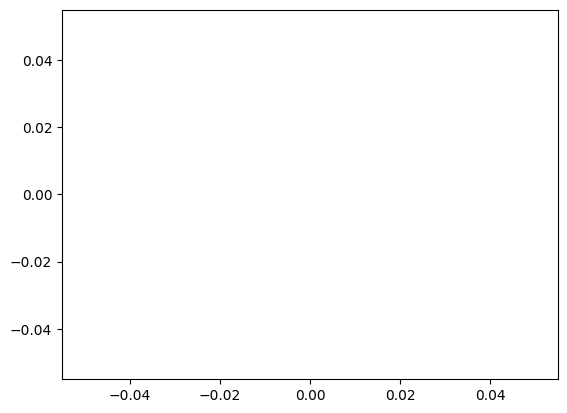

In [23]:
plt.plot(xplot, phi_set[9999])

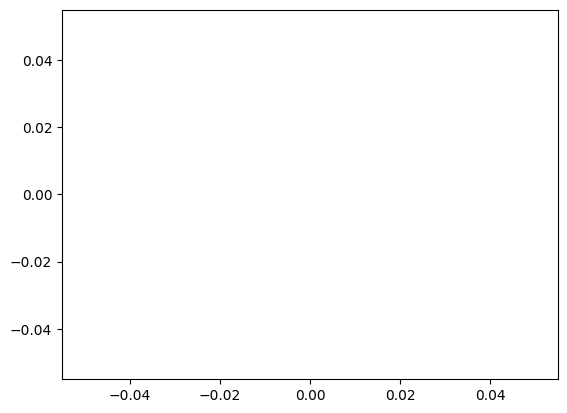

In [9]:
for i in range(It):
  plt.plot(xplot, phi_set[i])

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '5000.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmpncehqkgm/temp.m4v']' returned non-zero exit status 255.

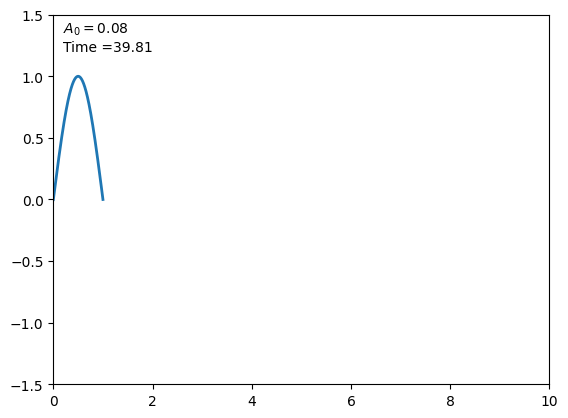

In [5]:
# Animation plot for Phi: Scalar Field dispersion

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl

fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-1.5, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(xplot, y)
  initA0_text.set_text("$A_0 = 0.08$")
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)


HTML(anim.to_html5_video())

#anim.save("animation_MS_dispersion.mp4")

